In [4]:
# Single-Multi Period Returns
import pandas as pd
stock=pd.read_csv('stockszA.csv',index_col='Trddt')
Vanke=stock[stock.Stkcd==2]
close=Vanke.Clsprc
close.head()
# close prices of 'Vanke'

Trddt
2014/1/2    7.99
2014/1/3    7.84
2014/1/6    7.48
2014/1/7    7.43
2014/1/8    7.42
Name: Clsprc, dtype: float64

In [5]:
# tranfer to timeseries (with dates)
close.index=pd.to_datetime(close.index)
close.index.name='Date'
close.head()

Date
2014-01-02    7.99
2014-01-03    7.84
2014-01-06    7.48
2014-01-07    7.43
2014-01-08    7.42
Name: Clsprc, dtype: float64

In [6]:
# lag one period
lagclose=close.shift(1)
lagclose.head()

Date
2014-01-02     NaN
2014-01-03    7.99
2014-01-06    7.84
2014-01-07    7.48
2014-01-08    7.43
Name: Clsprc, dtype: float64

In [7]:
# combine two data sets
Calclose=pd.DataFrame({'close':close,'lagclose':lagclose})
Calclose.head()

,close,lagclose
Date,,
2014-01-02,7.99,NaN
2014-01-03,7.84,7.99
2014-01-06,7.48,7.84
2014-01-07,7.43,7.48
2014-01-08,7.42,7.43


In [8]:
# single peoriod
simpleret=(close-lagclose)/lagclose
simpleret.name='simpleret'
simpleret.head()
calret=pd.merge(Calclose,pd.DataFrame(simpleret),left_index=True,right_index=True)
calret.head()

,close,lagclose,simpleret
Date,,,
2014-01-02,7.99,NaN,NaN
2014-01-03,7.84,7.99,-0.018773
2014-01-06,7.48,7.84,-0.045918
2014-01-07,7.43,7.48,-0.006684
2014-01-08,7.42,7.43,-0.001346


In [9]:
# multi peoriod
simpleret2=(close-close.shift(2))/close.shift(2)
simpleret2.name='simpleret2'
calret['simpleret2']=simpleret2
calret.head()

,close,lagclose,simpleret,simpleret2
Date,,,,
2014-01-02,7.99,NaN,NaN,NaN
2014-01-03,7.84,7.99,-0.018773,NaN
2014-01-06,7.48,7.84,-0.045918,-0.063830
2014-01-07,7.43,7.48,-0.006684,-0.052296
2014-01-08,7.42,7.43,-0.001346,-0.008021


In [10]:
calret.iloc[5,:]

close         7.460000
lagclose      7.420000
simpleret     0.005391
simpleret2    0.004038
Name: 2014-01-09 00:00:00, dtype: float64

In [11]:
# use python function to calculate returns
import ffn
ffnSimpleret=ffn.to_returns(close)
ffnSimpleret.name='ffnSimpleret'
ffnSimpleret.head()

Date
2014-01-02         NaN
2014-01-03   -0.018773
2014-01-06   -0.045918
2014-01-07   -0.006684
2014-01-08   -0.001346
Name: ffnSimpleret, dtype: float64

In [14]:
# annualized returns, assume 245 trading days
annualize=(1+simpleret).cumprod()[-1]**(245/311)-1
annualize
# an number

0.56606148743496409

In [15]:
# or define your own function
# def annualize(returns,period):
#    if period=='day':
#        return((1+returns).cumprod()[-1]**(245/len(returns))-1)
#    elif ...

In [17]:
# take dividends into consideration
# continuous composited dividend
import numpy as np
comporet=np.log(close/lagclose)
comporet.name='comporet'
comporet.head()

Date
2014-01-02         NaN
2014-01-03   -0.018952
2014-01-06   -0.047006
2014-01-07   -0.006707
2014-01-08   -0.001347
Name: comporet, dtype: float64

In [18]:
comporet[5]

0.0053763570363804958

In [19]:
ffnComporet=ffn.to_log_returns(close)
ffnComporet.head()

Date
2014-01-02         NaN
2014-01-03   -0.018952
2014-01-06   -0.047006
2014-01-07   -0.006707
2014-01-08   -0.001347
Name: Clsprc, dtype: float64

In [21]:
# multi period case
comporet2=np.log(close/close.shift(2))
comporet2.name='comporet2'
comporet2.head()

Date
2014-01-02         NaN
2014-01-03         NaN
2014-01-06   -0.065958
2014-01-07   -0.053713
2014-01-08   -0.008054
Name: comporet2, dtype: float64

In [22]:
comporet2[5]

0.0040295554860016423

In [23]:
# relations 
comporet=comporet.dropna()
comporet.head()

Date
2014-01-03   -0.018952
2014-01-06   -0.047006
2014-01-07   -0.006707
2014-01-08   -0.001347
2014-01-09    0.005376
Name: comporet, dtype: float64

In [25]:
sumcomporet=comporet+comporet.shift(1)
sumcomporet.head()

Date
2014-01-03         NaN
2014-01-06   -0.065958
2014-01-07   -0.053713
2014-01-08   -0.008054
2014-01-09    0.004030
Name: comporet, dtype: float64

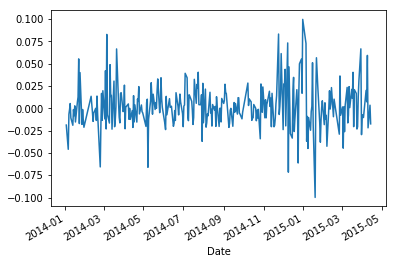

In [26]:
# plot 
simpleret.plot()

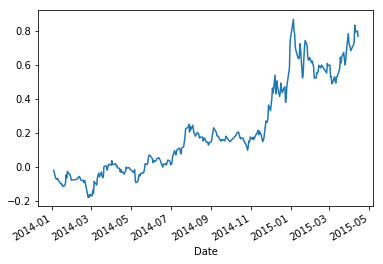

In [27]:
# acuumulation case
((1+simpleret).cumprod()-1).plot()

In [30]:
# risks
SAPower=pd.read_csv('SAPower.csv',index_col='Date')
SAPower.index=pd.to_datetime(SAPower.index)
DalianRP=pd.read_csv('DalianRP.csv',index_col='Date')
DalianRP.index=pd.to_datetime(DalianRP.index)
returnS=ffn.to_returns(SAPower.Close).dropna()
returnD=ffn.to_returns(DalianRP.Close).dropna()
# make comparison
[returnS.std(),returnD.std()]

[0.041511404614033375, 0.020319411733180383]

In [31]:
# downside risk
def cal_half_dev(returns):
    mu=returns.mean()
    temp=returns[returns<mu]
    half_deviation=(sum((mu-temp)**2)/len(returns))**0.5
    return(half_deviation)
[cal_half_dev(returnS),cal_half_dev(returnD)]

[0.03559345345188915, 0.013699709683876092]

In [32]:
# VaR
# hitorical simulation method
[returnS.quantile(0.05),returnD.quantile(0.05)]

[-0.043192456894806296, -0.03408596308105866]

In [33]:
# cov matrix method
from scipy.stats import norm
[norm.ppf(0.05,returnS.mean(),returnS.std()),norm.ppf(0.05,returnD.mean(),returnD.std())]

[-0.066210862160221484, -0.03274944602236822]

In [36]:
# expected shortfall (ES)
[returnS[returnS<=returnS.quantile(0.05)].mean(),returnD[returnD<=returnD.quantile(0.05)].mean()]

[-0.09673316088802106, -0.045367282385701486]

In [40]:
# Maximum Drawdown, MDD
# D(T)=max{0, (max_{t\in(0,T)}P_t)-P_T}
# d(T)=D(T)/(max_{t\in(0,T)}P_t)
import datetime
r=pd.Series([0,0.1,-0.1,-0.01,0.01,0.02],index=[datetime.date(2015,7,x) for x in range(3,9)])
r

2015-07-03    0.00
2015-07-04    0.10
2015-07-05   -0.10
2015-07-06   -0.01
2015-07-07    0.01
2015-07-08    0.02
dtype: float64

In [41]:
value=(1+r).cumprod()
value

2015-07-03    1.000000
2015-07-04    1.100000
2015-07-05    0.990000
2015-07-06    0.980100
2015-07-07    0.989901
2015-07-08    1.009699
dtype: float64

In [43]:
D=value.cummax()-value
D

2015-07-03    0.000000
2015-07-04    0.000000
2015-07-05    0.110000
2015-07-06    0.119900
2015-07-07    0.110099
2015-07-08    0.090301
dtype: float64

In [44]:
d=D/(D+value)
d

2015-07-03    0.000000
2015-07-04    0.000000
2015-07-05    0.100000
2015-07-06    0.109000
2015-07-07    0.100090
2015-07-08    0.082092
dtype: float64

In [45]:
MDD=D.max()
MDD

0.11990000000000001

In [46]:
mdd=d.max()
mdd

0.109

In [47]:
# use ffn package
ffn.calc_max_drawdown(value)

-0.10899999999999999

In [48]:
# examples
[ffn.calc_max_drawdown((1+returnS).cumprod()),ffn.calc_max_drawdown((1+returnD).cumprod())]

[-0.56763925729442977, -0.24797570850202422]